In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
import seaborn as sns


from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import io
#importer les données Advertising.csv
from google.colab import files
data_to_load = files.upload()
data = pd.read_csv(io.BytesIO(data_to_load['Publicites.csv']))

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Saving Publicites.csv to Publicites.csv


In [ ]:
data.head(n=10)

,Duree,Age,Revenu_moyen,Duree_internet,Titre,Ville,Genre,Pays,Heure_clique,Clique
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [ ]:
data.shape

(1000, 10)

**Vérifierons notre ensemble de données pour les valeurs nulles**

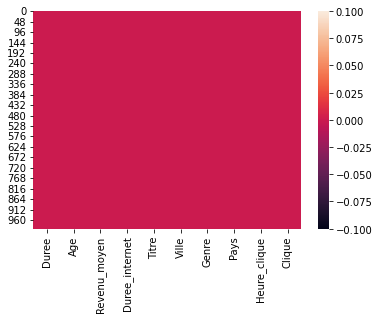

In [ ]:
sns.heatmap(data.isnull())

Il n'y a pas de valeurs nulles

**OUTPUT VARIABLE VISULATION**

[Text(0.5, 1.0, 'd')]

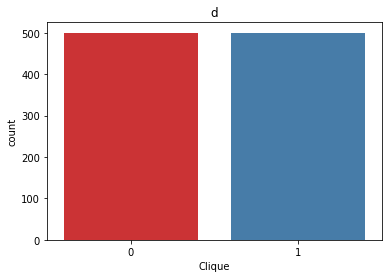

In [ ]:
sns.countplot(x='Clique',data=data,palette='Set1').set(title='d')

[Text(0.5, 1.0, 'd')]

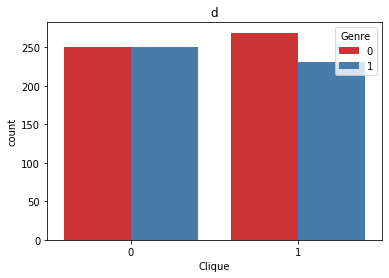

In [ ]:
sns.countplot(x='Clique',hue='Genre',data=data,palette='Set1').set(title='d')

Nous pouvons voir que  le genre n'aura pas d'impact significatif sur la décision de clique 

[Text(0.5, 1.0, 'd')]

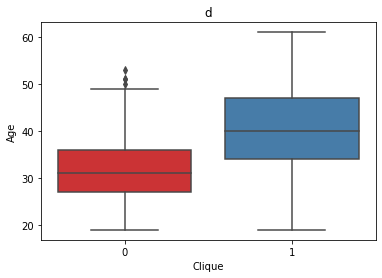

In [ ]:
sns.boxplot(y='Age',x='Clique',data=data,palette='Set1').set(title='d')

L'âge moyen des clients qui ont cliqué est supérieur à celui des clients qui ne l'ont pas fait.

In [ ]:
data.groupby('Clique').describe()

Duree                                                             \
        count      mean        std    min      25%    50%     75%    max   
Clique                                                                     
0       500.0  76.85462   7.560031  48.22  72.0775  77.65  82.070  91.43   
1       500.0  53.14578  12.822091  32.60  42.8375  51.53  62.075  91.37   

          Age          ... Duree_internet          Genre                   \
        count    mean  ...            75%     max  count   mean       std   
Clique                 ...                                                  
0       500.0  31.684  ...        231.865  267.01  500.0  0.500  0.500501   
1       500.0  40.334  ...        161.160  269.96  500.0  0.462  0.499053   

                                 
        min  25%  50%  75%  max  
Clique                           
0       0.0  0.0  0.5  1.0  1.0  
1       0.0  0.0  0.0  1.0  1.0  

[2 rows x 40 columns]

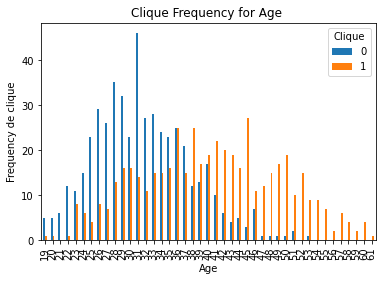

In [ ]:
%matplotlib inline
pd.crosstab(data.Age,data.Clique).plot(kind='bar') 
plt.title('Clique Frequency for Age ') 
plt.xlabel('Age')
plt.ylabel("Frequency de clique") 
plt.savefig('purchase_fre_job')

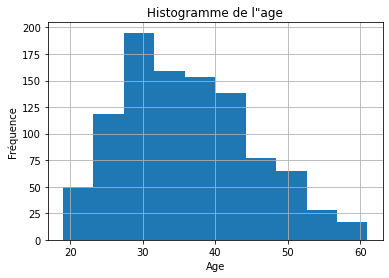

In [ ]:
data.Age.hist() 
plt.title('Histogramme de l"age') 
plt.xlabel('Age') 
plt.ylabel('Fréquence') 
plt.savefig('hist_age')

La plupart des clients dans cet ensemble de données sont dans la tranche d'âge de 26 à 45 ans.

La loi est 
dissymétrique, on préférera la transformer (log)

In [ ]:
#data['log_age']=1+np.log(data['Age'])
#data=data.drop(['Age'],1)


In [ ]:
data.log_age.hist() 
plt.title('Histogramme de l"age') 
plt.xlabel('log_Age') 
plt.ylabel('Fréquence') 
plt.savefig('hist_age')

AttributeError: ignored

In [ ]:
sns.pairplot(data)

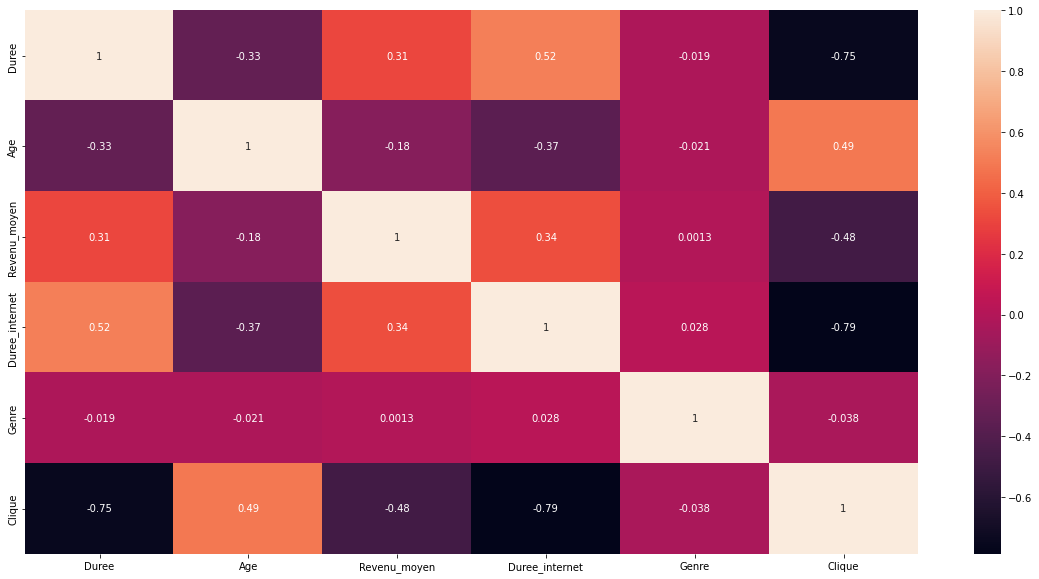

In [ ]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Duree           1000 non-null   float64
 1   Age             1000 non-null   int64  
 2   Revenu_moyen    1000 non-null   float64
 3   Duree_internet  1000 non-null   float64
 4   Titre           1000 non-null   object 
 5   Ville           1000 non-null   object 
 6   Genre           1000 non-null   int64  
 7   Pays            1000 non-null   object 
 8   Heure_clique    1000 non-null   object 
 9   Clique          1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
data.isnull().sum()

Duree             0
Age               0
Revenu_moyen      0
Duree_internet    0
Titre             0
Ville             0
Genre             0
Pays              0
Heure_clique      0
Clique            0
dtype: int64

In [ ]:
data.describe()

,Duree,Age,Revenu_moyen,Duree_internet,Genre,Clique
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [ ]:
formule  =  'Clique ~ Duree+Revenu_moyen+Duree_internet+Genre'

In [ ]:
Y=data["Clique"]

X=data[[ "Duree", "Revenu_moyen", "Duree_internet",'Genre']]


,Duree,Revenu_moyen,Duree_internet,Genre
0,68.95,61833.90,256.09,0
1,80.23,68441.85,193.77,1
2,69.47,59785.94,236.50,0
3,74.15,54806.18,245.89,1
4,68.37,73889.99,225.58,0
...,...,...,...,...
995,72.97,71384.57,208.58,1
996,51.30,67782.17,134.42,1
997,51.63,42415.72,120.37,1
998,55.55,41920.79,187.95,0


In [ ]:
from statsmodels.compat import lzip

x_train ,x_test, y_train ,y_test = train_test_split(X, Y, test_size = 0.2, random_state = 100)
x_train['Clique'] =y_train
y_train

675    0
358    1
159    1
533    0
678    0
      ..
855    1
871    0
835    0
792    0
520    1
Name: Clique, Length: 800, dtype: int64

In [ ]:
model = smf.glm(formula = formule,data =x_train ,family = sm.families.Binomial())
result = model.fit()
print(result.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clique   No. Observations:                  800
Model:                            GLM   Df Residuals:                      794
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -74.927
Date:                Tue, 25 Jan 2022   Deviance:                       149.85
Time:                        11:04:14   Pearson chi2:                     643.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         10.2344      3.973      2.

In [ ]:
formule2  =  'Clique ~ Duree+Revenu_moyen+Duree_internet+log_age'

In [ ]:
Y2=data["Clique"]

X2=data[[ "Duree", "Revenu_moyen", "Duree_internet", 'log_age']]


In [ ]:
from statsmodels.compat import lzip

x_train2 ,x_test2, y_train2 ,y_test2 = train_test_split(X2, Y2, test_size = 0.3, random_state = 100)
x_train2['Clique'] =y_train2

In [ ]:
model = smf.glm(formula = formule2,data =x_train2 ,family = sm.families.Binomial())
result2 = model.fit()
print(result2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 Clique   No. Observations:                  700
Model:                            GLM   Df Residuals:                      695
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -59.703
Date:                Tue, 25 Jan 2022   Deviance:                       119.41
Time:                        11:30:12   Pearson chi2:                     599.
No. Iterations:                     8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.4333      4.310      2.

In [ ]:
y_preds = result2.predict(x_test2)
y_preds

249    0.996917
353    0.009432
537    0.037157
424    0.999808
564    0.990887
         ...   
193    0.999989
838    0.999997
974    0.999992
203    0.052679
425    0.996904
Length: 300, dtype: float64

In [ ]:
y_train_pred_final = pd.DataFrame({'Click':y_test2.values, 'Click_Prob':y_preds})
y_train_pred_final.head()

,Click,Click_Prob
249,1,0.996917
353,0,0.009432
537,0,0.037157
424,1,0.999808
564,1,0.990887


# **choisissons 0,5 comme seuil arbitraire**

In [ ]:
y_train_pred_final['predicted'] = y_train_pred_final.Click_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head(10)

,Click,Click_Prob,predicted
249,1,0.996917,1
353,0,0.009432,0
537,0,0.037157,0
424,1,0.999808,1
564,1,0.990887,1
124,1,0.990527,1
492,0,0.149547,0
553,1,0.999873,1
982,1,0.986799,1
935,0,0.008521,0


In [ ]:
# Confusion matrix 
from sklearn import metrics
confusion = metrics.confusion_matrix(y_train_pred_final.Click, y_train_pred_final.predicted )
print(confusion)

[[145   0]
 [  9 146]]


In [ ]:
principe rerrt("Coefficeients")
print(result2.params)
print()
print("p-Values")
print(result2.pvalues)
print()
print("Dependent variables")
print(result2.model.endog_names)

Coefficeients
Intercept         11.433295
Duree             -0.200057
Revenu_moyen      -0.000136
Duree_internet    -0.063386
log_age            4.848281
dtype: float64

p-Values
Intercept         7.989521e-03
Duree             7.509353e-15
Revenu_moyen      7.419062e-09
Duree_internet    3.749724e-14
log_age           1.457820e-06
dtype: float64

Dependent variables
Clique


**Précision**

La précision est le pourcentage d'étiquettes correctement prédites. Les étiquettes correctement prédites à partir de la matrice seraient :
Vrai positif (TP) : les internaute cliquer sont prédits comme cliquer .

Vrai négatif (TN) : les internaute non cliquer sont prédits comme non cliquer.

Précision = (Étiquettes correctement prédites)/(Nombre total d'étiquettes)

Précision = (TN+TP)/ (TN+FP+FN+TP)

Selon notre modèle ci-dessus, 

TN = 146

FP = 0

FN = 9

TP = 145

In [ ]:
print(metrics.accuracy_score(y_train_pred_final.Click, y_train_pred_final.predicted))

0.97


La précision que nous obtenons par le code ci-dessus est 97%

**Sensibilité**

Pour les types de problèmes de cancer, nous utilisons la sensibilité.

Nous devons donc construire un modèle qui se traduit par une sensibilité élevée, c'est-à-dire que la valeur de FN (faux négatif) doit être aussi faible que possible.

Sensibilité = (TP)/(TP+FN)

**Spécificité**

Pour les types de transactions frauduleuses, nous construisons un modèle ayant une spécificité élevée, c'est-à-dire que la valeur de FP (faux positif) doit être aussi faible que possible.
Spécificité = (TN)/(TN+FP)

In [ ]:
TP = confusion[0,0] # true positive 
TN = confusion[1,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [ ]:
# Let's see the sensitivity of our logistic regression model
print(TP / float(TP+FN))

# Let us calculate specificity
print(TN / float(TN+FP))

0.9415584415584416
1.0


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Click, y_train_pred_final.predicted))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       145
           1       1.00      0.94      0.97       155

    accuracy                           0.97       300
   macro avg       0.97      0.97      0.97       300
weighted avg       0.97      0.97      0.97       300



0.9709677419354839


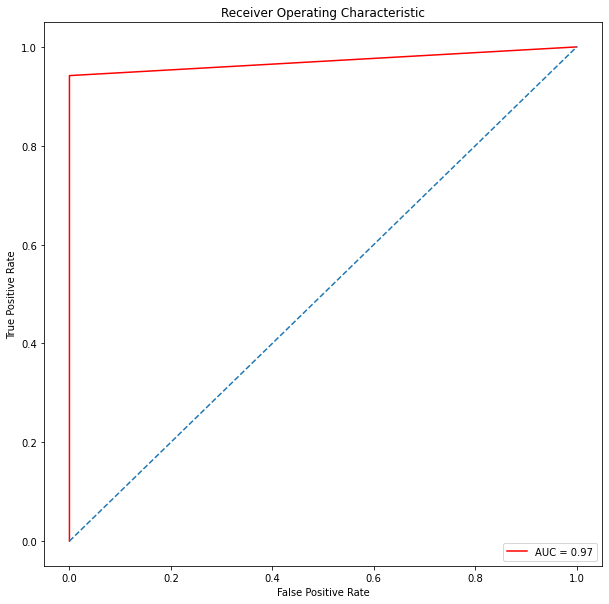

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train_pred_final.Click, y_train_pred_final.predicted)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()